# Задача
Retention – один из самых важных показателей в компании. 

Задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

# 1. Загружаем необходимые библиотеки

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# игнорируем замечания по поводу необновленного пакета
import warnings
warnings.filterwarnings('ignore')

# 2. Загрузка и предобработка данных о времени регистрации

In [2]:
reg_data = pd.read_csv('~/problem1-reg_data.csv', sep=';')
reg_data.tail(2)

,reg_ts,uid
999998,1600874191,1110621
999999,1600874244,1110622


In [3]:
reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [4]:
# Приведем колонку с датами 'reg_ts' в формате Unix epoch к привычному формату местного времени

reg_data['reg_ts'] = reg_data['reg_ts'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y%m%d"))
reg_data.dtypes

reg_ts    object
uid        int64
dtype: object

In [5]:
# Конвертируем колонку с датами 'reg_ts' в формат datetime64[ns]

reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'])
reg_data.dtypes

reg_ts    datetime64[ns]
uid                int64
dtype: object

In [6]:
# Посмотрим на размер таблицы со временем регистрации, а так же, на пустые или нулевые строки

reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   reg_ts  1000000 non-null  datetime64[ns]
 1   uid     1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.3 MB


# 3. Загрузка и предобработка данных о времени захода пользователей в игру

In [7]:
auth_data = pd.read_csv('~/problem1-auth_data.csv', sep=';')
auth_data.head(2)

,auth_ts,uid
0,911382223,1
1,932683089,2


In [8]:
auth_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [9]:
# Приведем колонку с датами 'reg_ts' к привычному формату местного времени

auth_data['auth_ts'] = auth_data['auth_ts'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y%m%d"))
auth_data.dtypes

auth_ts    object
uid         int64
dtype: object

In [10]:
# Конвертируем колонку с датами 'auth_ts' в формат datetime64[ns]

auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'])
auth_data.dtypes

auth_ts    datetime64[ns]
uid                 int64
dtype: object

In [11]:
# Посмотрим на размер таблицы со временем захода в игру, а так же, на пустые или нулевые строки

auth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype         
---  ------   -----         
 0   auth_ts  datetime64[ns]
 1   uid      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 146.5 MB


In [12]:
auth_data.isna().sum()

auth_ts    0
uid        0
dtype: int64

In [13]:
# Посмотрим на количество уникальных значений в каждой таблице

In [14]:
reg_data.uid.nunique()

1000000

In [15]:
auth_data.uid.nunique()

1000000

# 4. Объединение датасетов

Объединим таблицу с датами захода в игру с таблицей регистраций по uid и по левому краю. Поскольку ранее мы проверили, что количество уникальных зарегистрированных пользователей совпадает с количеством уникальных пользователей, зашедших в игру, нам нужно, чтобы сохранилась информация обо всех действиях зарегистрированных пользователей (сколько раз они заходили в игру)

In [16]:
auth_reg_data = pd.merge(auth_data, reg_data, on='uid')
auth_reg_data.tail()

,auth_ts,uid,reg_ts
9601008,2020-09-23,1110618,2020-09-23
9601009,2020-09-23,1110619,2020-09-23
9601010,2020-09-23,1110620,2020-09-23
9601011,2020-09-23,1110621,2020-09-23
9601012,2020-09-23,1110622,2020-09-23


In [17]:
# Проверим, чтобы количество строк в общей таблице было таким же, как в таблице со временем захода в игру

auth_reg_data.shape

(9601013, 3)

In [18]:
# Посмотрим, за какой период наш датасет

auth_reg_data['auth_ts'].min()

Timestamp('1998-11-18 00:00:00')

In [19]:
auth_reg_data['auth_ts'].max()

Timestamp('2020-09-23 00:00:00')

In [20]:
auth_reg_data['reg_ts'].min()

Timestamp('1998-11-18 00:00:00')

In [21]:
auth_reg_data['reg_ts'].max()

Timestamp('2020-09-23 00:00:00')

Периоды регистраций и заходов: с 1998-11-18 по 2020-09-23

Посмотрим на периоды активности игроков по датам регистрации и захода в игру на графиках

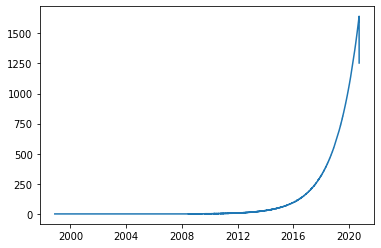

In [22]:
# Посмотрим на периоды активности игроков по датам регистрации

plt.plot((reg_data.groupby('reg_ts', as_index=False).uid.nunique())['reg_ts'],
         (reg_data.groupby('reg_ts', as_index=False).uid.nunique())['uid'])

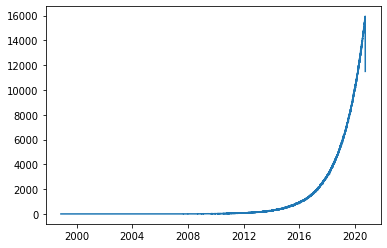

In [23]:
# Посмотрим на периоды активности игроков по датам входа в игру

plt.plot((auth_reg_data.groupby('auth_ts', as_index=False).uid.count())['auth_ts'],
         (auth_reg_data.groupby('auth_ts', as_index=False).uid.count())['uid'])

Из обоих графиков видно, что период роста активности приходитсяна период, начиная с 2018 года, особенно интенсивный рост был с 2019 года и весь 2020 год.
Можно выбрать интересующий период

# 5. Пишем функцию для расчета классического ретеншена.

- Classic Retention Rate (удержание) — это метрика, которая показывает процент пользователей, вернувшихся в продукт в конкретный день N с момента первого посещения.

В функцию будем передавать аргументы:
    - df - получившийся датафрейм (объединение информации о времени регистрации и о времени захода пользователей в игру, с преобразованными типами данных)
    - first - дата начала периода когорт (вводим в формате '2018-01-01')
    - last - дата окончания периода когорт (вводим в формате '2018-01-31')
    
Этапы написания функции:
1. Сортируем датафрейм по заданному интервалу дат;  
2. Считаем промежуток времени от даты регистрации в днях, через который каждый пользователь заходил в игру;
3. Рассматриваем когорты по дням, поэтому сгруппируем игроков по дате регистрации, вторая группировка - по
   периоду активности игрока для того, чтобы мы понимали, как долго каждый игрок был активен с момента
   регистрации, и посчитаем количество активных игроков
4. Формируем сводную таблицу   
5. Считаем Classic Retention Rate, метрику, которая показывает процент пользователей, вернувшихся в продукт в
   конкретный день N
6. Рисуем тепловую карту

In [24]:
def retention(df, first, last):
    
    ''' Сортировка датафрейма по заданной дате'''
    df = (df.loc[(df['auth_ts'] >= first) & (df['auth_ts'] <= last) & (df['reg_ts'] >= first) & (df['reg_ts'] <= last)])
    
    ''' Посчитаем, через какое количество дней от даты регистрации игрок заходил в игру'''
    df['time_diff'] = (df['auth_ts'] - df['reg_ts']).dt.days
    
    ''' Группировка игроков по дате регистрации и по периоду активности, считаем количество активных игроков'''
    cohort_table = df.groupby(['reg_ts', 'time_diff'], as_index=False)['uid'].agg(['nunique'])\
                                                                             .rename(columns={'nunique': 'Active_uid'})\
                                                                             .reset_index()
    ''' Поворот сводной когортной таблицы'''
    cohort_table1 = cohort_table.pivot_table(index='reg_ts', columns='time_diff', values='Active_uid')
    
    ''' Расчет Classic Retention Rate'''
    cohort_table_persentage = cohort_table1.divide(cohort_table1.iloc[:, 0], axis=0).round(2).drop([0], axis = 1)
    cohort_table_persentage.insert(loc = 0, 
                 column = 'cohort_size',
                 value = df.groupby('reg_ts').uid.nunique())                          
    
    ''' Рисуем тепловую карту'''
    plt.figure(figsize=(21, 10))
    sns.heatmap(cohort_table_persentage, annot=True, vmin=0, vmax=0.1)
    plt.ylabel('First_reg')
    plt.xlabel('Activity_days')
    plt.suptitle('Cohort retention table')
    plt.show()
    
    return cohort_table_persentage

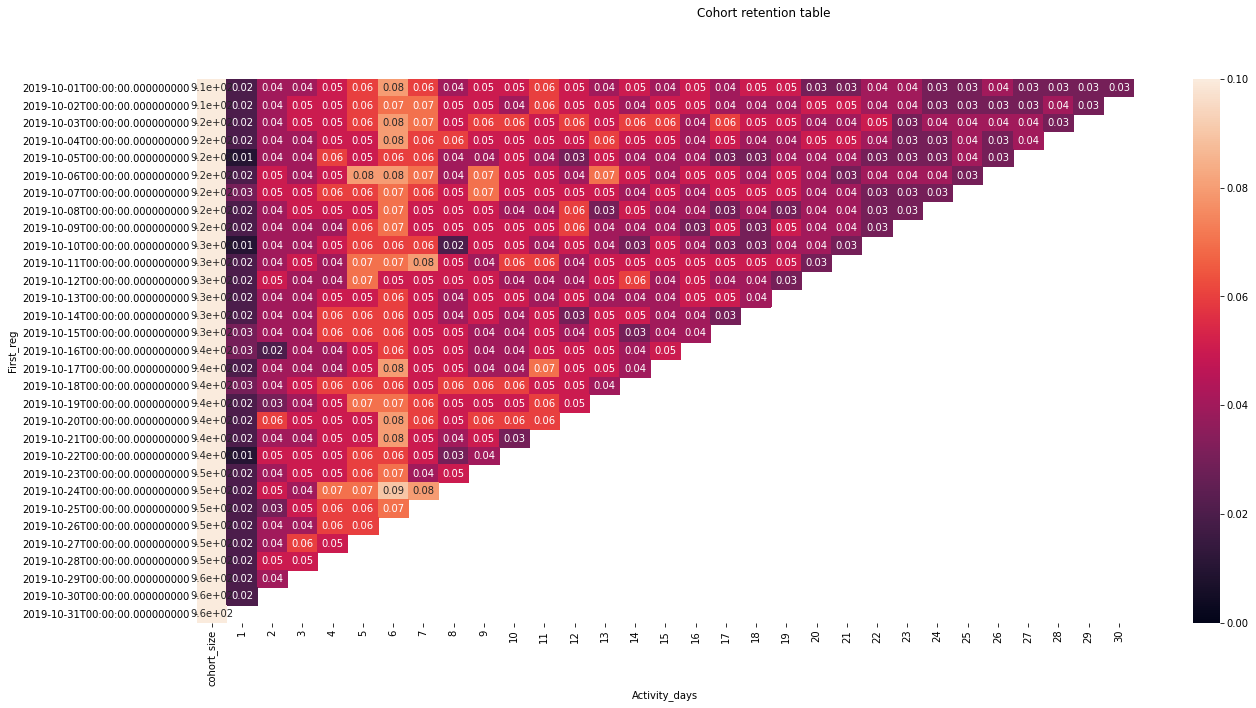

time_diff,cohort_size,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
reg_ts,,,,,,,,,,,,,,,,,,,,,
2019-10-01,912,0.02,0.04,0.04,0.05,0.06,0.08,0.06,0.04,0.05,...,0.03,0.04,0.04,0.03,0.03,0.04,0.03,0.03,0.03,0.03
2019-10-02,914,0.02,0.04,0.05,0.05,0.06,0.07,0.07,0.05,0.05,...,0.05,0.04,0.04,0.03,0.03,0.03,0.03,0.04,0.03,NaN
2019-10-03,916,0.02,0.04,0.05,0.05,0.06,0.08,0.07,0.05,0.06,...,0.04,0.05,0.03,0.04,0.04,0.04,0.04,0.03,NaN,NaN
2019-10-04,916,0.02,0.04,0.04,0.05,0.05,0.08,0.06,0.06,0.05,...,0.05,0.04,0.03,0.03,0.04,0.03,0.04,NaN,NaN,NaN
2019-10-05,919,0.01,0.04,0.04,0.06,0.05,0.06,0.06,0.04,0.04,...,0.04,0.03,0.03,0.03,0.04,0.03,NaN,NaN,NaN,NaN
2019-10-06,920,0.02,0.05,0.04,0.05,0.08,0.08,0.07,0.04,0.07,...,0.03,0.04,0.04,0.04,0.03,NaN,NaN,NaN,NaN,NaN
2019-10-07,921,0.03,0.05,0.05,0.06,0.06,0.07,0.06,0.05,0.07,...,0.04,0.03,0.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,923,0.02,0.04,0.05,0.05,0.05,0.07,0.05,0.05,0.05,...,0.04,0.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,924,0.02,0.04,0.04,0.04,0.06,0.07,0.05,0.05,0.05,...,0.04,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Проверка

retention(auth_reg_data, "2019-10-01", "2019-10-31")